Machine Learning Homework 5 <br>
Create your own classification model of the Iris data set in Juypter notebook. Include a visualization of the decision boundries.

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris)

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [2]:
type(iris)

sklearn.datasets.base.Bunch

In [3]:
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


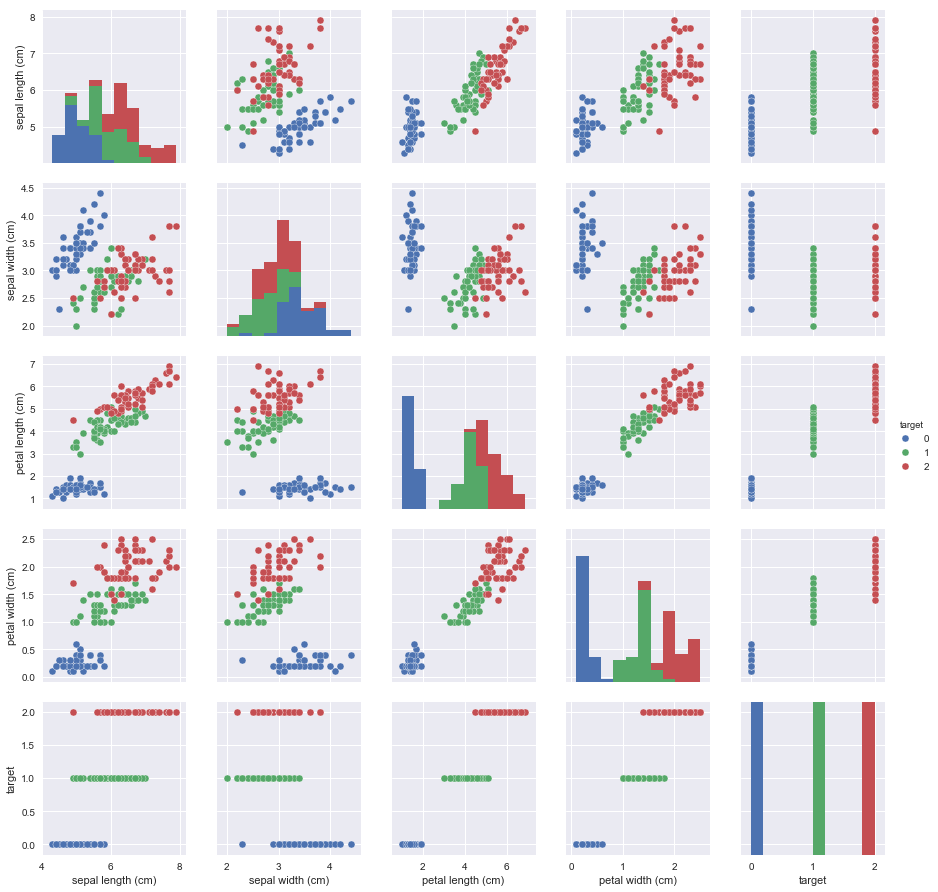

In [5]:
## Pairplot of iris data with hue equals to target(0,1,2)
import seaborn as sns
%matplotlib inline
sns.pairplot(data=iris_df, hue='target')

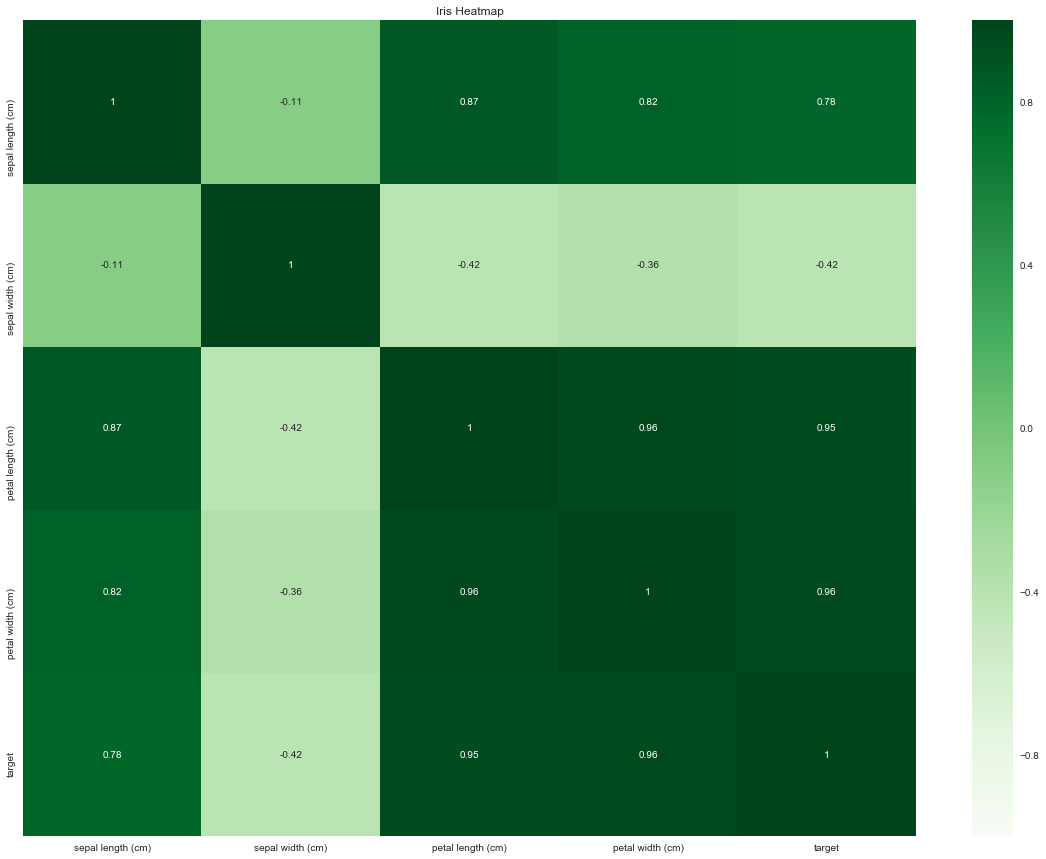

In [6]:
## Correlation Heatmap
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Iris Heatmap")
corr = iris_df.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           cmap='Greens',
           annot=True)
plt.show()

In [10]:
## Split data from training and testing sets: Using two features (petal length and petal width)
from sklearn.model_selection import train_test_split
X = iris_df[['petal length (cm)','petal width (cm)']]
y = iris_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [13]:
## KNN 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_std, y_train)
predictions_knn = knn.predict(X_test_std)
print(classification_report(y_test, predictions_knn))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       0.93      0.93      0.93        15
          2       0.94      0.94      0.94        17

avg / total       0.96      0.96      0.96        45



In [14]:
print(confusion_matrix(y_test, predictions_knn))

[[13  0  0]
 [ 0 14  1]
 [ 0  1 16]]


In [15]:
## logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions_logreg = logreg.predict(X_test)
print(classification_report(y_test, predictions_logreg))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       0.83      0.67      0.74        15
          2       0.75      0.88      0.81        17

avg / total       0.85      0.84      0.84        45



In [16]:
print(confusion_matrix(y_test, predictions_logreg))

[[13  0  0]
 [ 0 10  5]
 [ 0  2 15]]


In [17]:
## plot_decision_regions Function
## Reference: https://github.com/hanxlinsist/jupyter_hub/blob/master/csdn/tools.py

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidth=1, marker='o', s=55, label='test set')

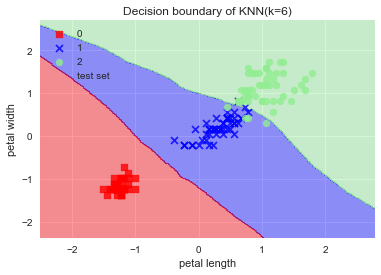

In [18]:
## Plot Knn decision boundary
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.title('Decision boundary of KNN(k=6)')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()